In [925]:
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.patches as mpt
from scipy.optimize import curve_fit
from numpy import polyfit, poly1d, array, log, arange, arctan, pi, trapz, fft, imag, real

In [849]:
style.use('seaborn-darkgrid')
rcParams['figure.figsize'] = (24, 16)

In [3]:
path = '2019_04_11/'
ext = '.xlsx'

In [4]:
pressure = ['93', '94', '95', '96', '97']
current = ['0,45', '0,5', '0,55', '0,6', '0,65']

In [201]:
class DataFrame():
    sheets = []
           
    def __new__(cls, name, sheet, index, df=None):    
        if len(cls.sheets) < 5 :
            cls.sheets.append(super().__new__(cls))
        else:
            cls.sheets = []
            cls.sheets.append(super().__new__(cls))
        return super(DataFrame, cls).__new__(cls)
    
    def __init__(self, name, sheet, index, df=None):
        self.name = name
        self.sheet = sheet
        self.index = index
        self.df = pd.read_excel(path + name + ext, sheet[index], \
                                names=['wave length $\lambda$', 'saturation'])
        
        """
        def __get__(self, inst, inst_type): 
            return self
        
        @staticmethod
        def filler():
            sheets.append(self)
        """
        
    def table(self, lines):
        try:
            self.df = self.df.set_index('wave length $\lambda$')
        except KeyError:
            pass
        return self.df.head(lines)

In [847]:
class CurveLine(DataFrame):      
    def __init__(self, name, sheet, index, x_ax=None, y_ax=None, folder='pics/', ext='png', dpi=500):
        super().__init__(name, sheet, index, df=None)  # by the way it even doesn't recognize set folder\
        self.x_ax = array(self.df.index)               # ext and dpi
        self.y_ax = self.df['saturation']              # strange thing of drawer realisation, so
        self.folder = folder                           # this specific __init__ is useless
        self.ext = ext
        self.dpi = dpi
     
        # because of __new__ no option to initialise\
        # attrs of what is not in DataFrame\
        # just such a stupid thing
        
    def customizer(self, title, color, fontsize):
        self.title = title
        self.color = color
        self.fontsize = fontsize
        #self.name = self.name + '_' + self.sheet[self.index] + '.'
        self.name = self.name + '.'
        name = self.name
        # return {'title':title, 'color':color, 'fontsize':fontsize, 'name':name}
    
    @staticmethod
    def drawer(rows, columns, designation, folder='pics/', ext='png', dpi=500, ax=True):  # here was custom arg
        _ = designation
        if ax:
            fig, axes = subplots(rows, columns, figsize=(14, 30))  # MAY BE FIXED
            #plot(self.x_ax, self.y_ax, self.color)
            #for _ in list(storage.keys()):          # caused MemoryError
        
            for i, ax in enumerate(axes.flatten()):  # unevident code pattern\
                name = storage[_][i].name          # look later
                title = storage[_][i].title
                color = storage[_][i].color
                fontsize = storage[_][i].fontsize
                ax.plot(storage[_][i].df, color)  
                ax.set_title(title, fontsize=fontsize)
                ax.set_xlabel('Wave Length $\lambda$, nm', fontsize=fontsize) 
                ax.set_ylabel('Saturation Intensity, %', fontsize=fontsize)
                if i+1 == len(storage[_]):
                    savefig(folder+name+ext, format=ext, dpi=dpi)
        else:
            name = storage[_][0].name          # look later
            plot(storage[_][0].df, storage[_][0].color)  
            suptitle(storage[_][0].title, fontsize=storage[_][0].fontsize)
            xlabel('Wave Length $\lambda$, nm', fontsize=storage[_][0].fontsize) 
            ylabel('Saturation Intensity, %', fontsize=storage[_][0].fontsize)
            savefig(folder+name+ext, format=ext, dpi=dpi)

In [229]:
storage = {'p_full':pressure, 'I_full':current, 'p_max':pressure, 'I_max':current}

print('Processing...\n')
for _ in list(storage.keys()):
    for i in range(len(pressure or current)):
        print(storage[_], i)
        DataFrame.sheets[i] = CurveLine(_, sheet=storage[_], index=i)  # ridiculous kostbilb
    storage[_] = list(DataFrame.sheets)  # **anaya ssiblka

Processing...

['93', '94', '95', '96', '97'] 0
['93', '94', '95', '96', '97'] 1
['93', '94', '95', '96', '97'] 2
['93', '94', '95', '96', '97'] 3
['93', '94', '95', '96', '97'] 4
['0,45', '0,5', '0,55', '0,6', '0,65'] 0
['0,45', '0,5', '0,55', '0,6', '0,65'] 1
['0,45', '0,5', '0,55', '0,6', '0,65'] 2
['0,45', '0,5', '0,55', '0,6', '0,65'] 3
['0,45', '0,5', '0,55', '0,6', '0,65'] 4
['93', '94', '95', '96', '97'] 0
['93', '94', '95', '96', '97'] 1
['93', '94', '95', '96', '97'] 2
['93', '94', '95', '96', '97'] 3
['93', '94', '95', '96', '97'] 4
['0,45', '0,5', '0,55', '0,6', '0,65'] 0
['0,45', '0,5', '0,55', '0,6', '0,65'] 1
['0,45', '0,5', '0,55', '0,6', '0,65'] 2
['0,45', '0,5', '0,55', '0,6', '0,65'] 3
['0,45', '0,5', '0,55', '0,6', '0,65'] 4


In [230]:
for _ in list(storage.keys()):
    for i in range(len(pressure or current)):
        display(_, i, storage[_][i].table(10))

'p_full'

0

,saturation
wave length $\lambda$,
320.01,0.243392
320.02,0.131553
320.03,0.131553
320.04,0.131553
320.05,0.131553
320.06,0.019714
320.07,0.243392
320.08,0.243392
320.09,0.243392


'p_full'

1

,saturation
wave length $\lambda$,
320.01,0.021035
320.02,0.132875
320.03,0.132875
320.04,0.132875
320.05,0.021035
320.06,0.021035
320.07,0.021035
320.08,0.132875
320.09,0.021035


'p_full'

2

,saturation
wave length $\lambda$,
320.01,0.257875
320.02,0.034196
320.03,0.034196
320.04,0.146035
320.05,0.257875
320.06,0.146035
320.07,0.257875
320.08,0.257875
320.09,0.146035


'p_full'

3

,saturation
wave length $\lambda$,
320.01,0.157875
320.02,0.157875
320.03,-0.065804
320.04,0.046035
320.05,0.157875
320.06,0.046035
320.07,0.046035
320.08,0.046035
320.09,0.046035


'p_full'

4

,saturation
wave length $\lambda$,
325.01,0.034196
325.02,0.034196
325.03,0.146035
325.04,-0.077643
325.05,0.034196
325.06,0.146035
325.07,0.034196
325.08,0.034196
325.09,0.034196


'I_full'

0

,saturation
wave length $\lambda$,
320.01,-0.057929
320.02,-0.057929
320.03,0.053910
320.04,0.053910
320.05,-0.057929
320.06,0.165749
320.07,0.165749
320.08,0.053910
320.09,0.277588


'I_full'

1

,saturation
wave length $\lambda$,
320.01,0.081553
320.02,0.081553
320.03,0.081553
320.04,-0.030286
320.05,-0.030286
320.06,-0.030286
320.07,-0.030286
320.08,-0.030286
320.09,0.081553


'I_full'

2

,saturation
wave length $\lambda$,
320.01,0.202588
320.02,0.090749
320.03,0.202588
320.04,0.314428
320.05,0.202588
320.06,0.314428
320.07,0.314428
320.08,0.314428
320.09,0.314428


'I_full'

3

,saturation
wave length $\lambda$,
320.01,-0.007929
320.02,0.103910
320.03,0.103910
320.04,0.103910
320.05,-0.007929
320.06,-0.007929
320.07,0.103910
320.08,0.103910
320.09,0.103910


'I_full'

4

,saturation
wave length $\lambda$,
320.01,0.164428
320.02,0.052588
320.03,0.052588
320.04,0.164428
320.05,0.052588
320.06,0.052588
320.07,0.276267
320.08,0.164428
320.09,0.052588


'p_max'

0

,saturation
wave length $\lambda$,
332.000130,-0.042037
332.003463,-0.100702
332.006796,-0.071369
332.010129,-0.012704
332.013462,-0.100702
332.016795,0.016628
332.020128,-0.012704
332.023461,-0.042037
332.026794,-0.042037


'p_max'

1

,saturation
wave length $\lambda$,
332.000130,0.000645
332.003463,0.000645
332.006796,0.059310
332.010129,0.029977
332.013462,0.029977
332.016795,0.059310
332.020128,0.029977
332.023461,0.029977
332.026794,0.117975


'p_max'

2

,saturation
wave length $\lambda$,
332.000130,0.083314
332.003463,0.053982
332.006796,0.053982
332.010129,0.053982
332.013462,0.053982
332.016795,0.053982
332.020128,0.053982
332.023461,0.053982
332.026794,0.024649


'p_max'

3

,saturation
wave length $\lambda$,
332.000130,0.012647
332.003463,-0.046018
332.006796,-0.016686
332.010129,-0.016686
332.013462,-0.075351
332.016795,-0.046018
332.020128,-0.046018
332.023461,-0.046018
332.026794,-0.046018


'p_max'

4

,saturation
wave length $\lambda$,
331.000230,0.075645
331.003563,0.046312
331.006896,0.075645
331.010229,0.016979
331.013562,0.046312
331.016895,-0.012353
331.020228,0.016979
331.023561,-0.012353
331.026894,-0.041686


'I_max'

0

,saturation
wave length $\lambda$,
332.000130,-0.011358
332.003463,0.017975
332.006796,0.076640
332.010129,0.047307
332.013462,0.076640
332.016795,0.076640
332.020128,0.017975
332.023461,0.076640
332.026794,0.047307


'I_max'

1

,saturation
wave length $\lambda$,
332.000130,-0.352399
332.003463,0.028924
332.006796,-0.205736
332.010129,-0.059073
332.013462,0.058257
332.016795,-0.088406
332.020128,-0.235069
332.023461,-0.117738
332.026794,-0.029741


'I_max'

2

,saturation
wave length $\lambda$,
332.000130,-0.033372
332.003463,0.025294
332.006796,0.025294
332.010129,0.025294
332.013462,0.025294
332.016795,0.054626
332.020128,-0.033372
332.023461,0.025294
332.026794,-0.033372


'I_max'

3

,saturation
wave length $\lambda$,
332.000130,-0.162704
332.003463,-0.074706
332.006796,0.130622
332.010129,0.101289
332.013462,-0.016041
332.016795,-0.074706
332.020128,-0.074706
332.023461,-0.074706
332.026794,-0.045374


'I_max'

4

,saturation
wave length $\lambda$,
332.000130,-0.016667
332.003463,-0.135185
332.006796,0.101852
332.010129,-0.016667
332.013462,-0.016667
332.016795,-0.016667
332.020128,-0.016667
332.023461,-0.135185
332.026794,-0.016667


In [231]:
def p_or_I(x):
    if p(x): return pressure
    else: return current
    
for _ in list(storage.keys()):
    for i in range(len(pressure or current)):
        p = lambda x: x[0] == 'p'
        storage[_][i].customizer(str(_)+' = '+ str(p_or_I(_)[i]), '-r', 16)

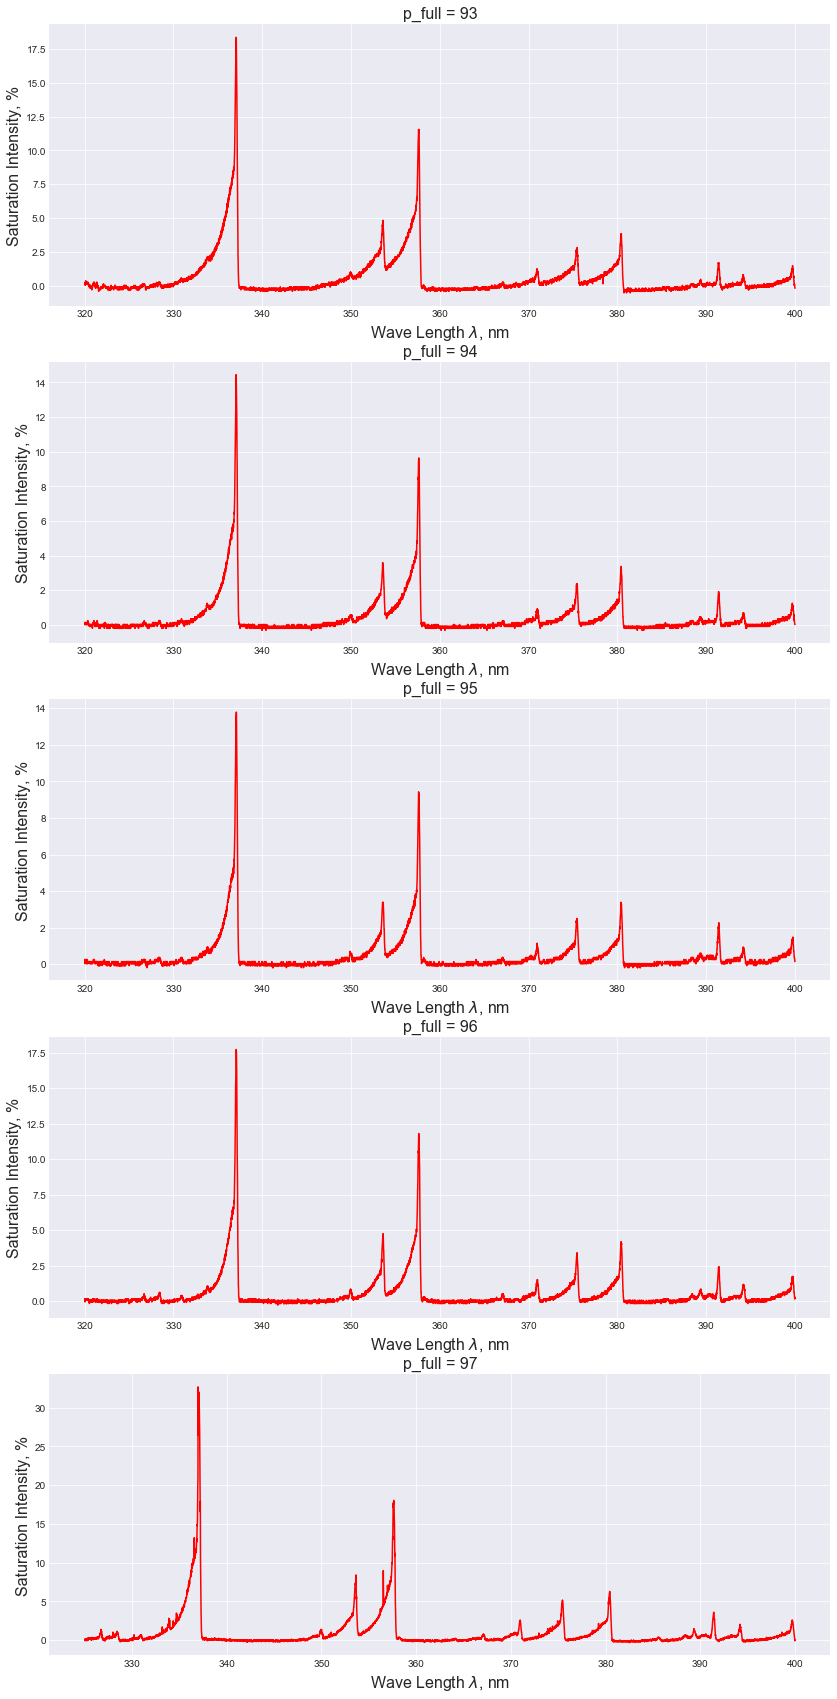

In [37]:
CurveLine.drawer(5, 1, 'p_full')

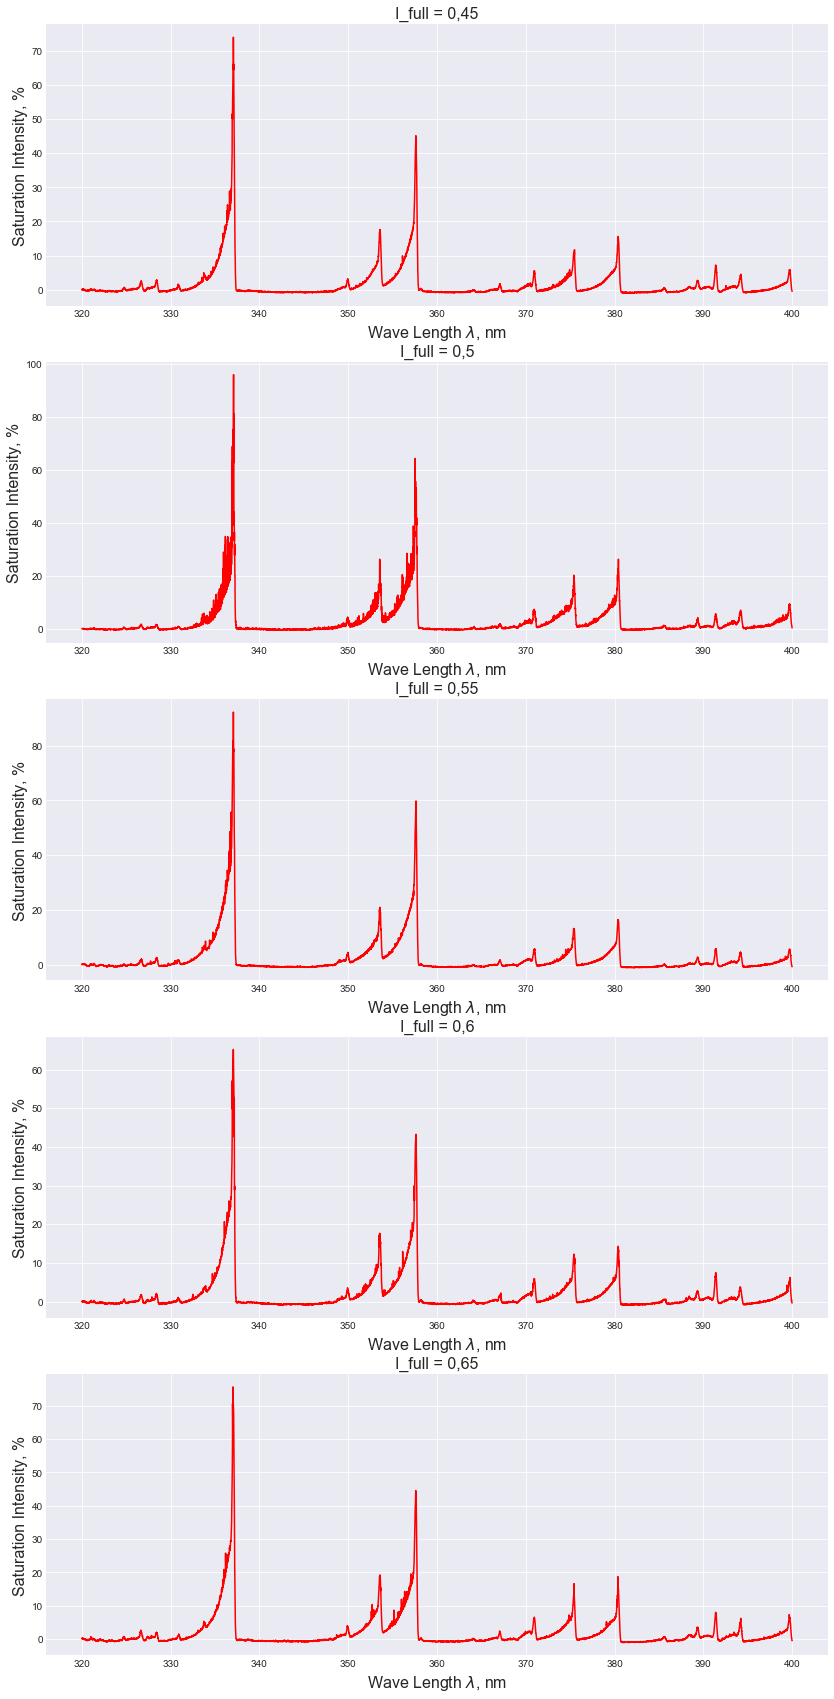

In [57]:
CurveLine.drawer(5, 1, 'I_full')

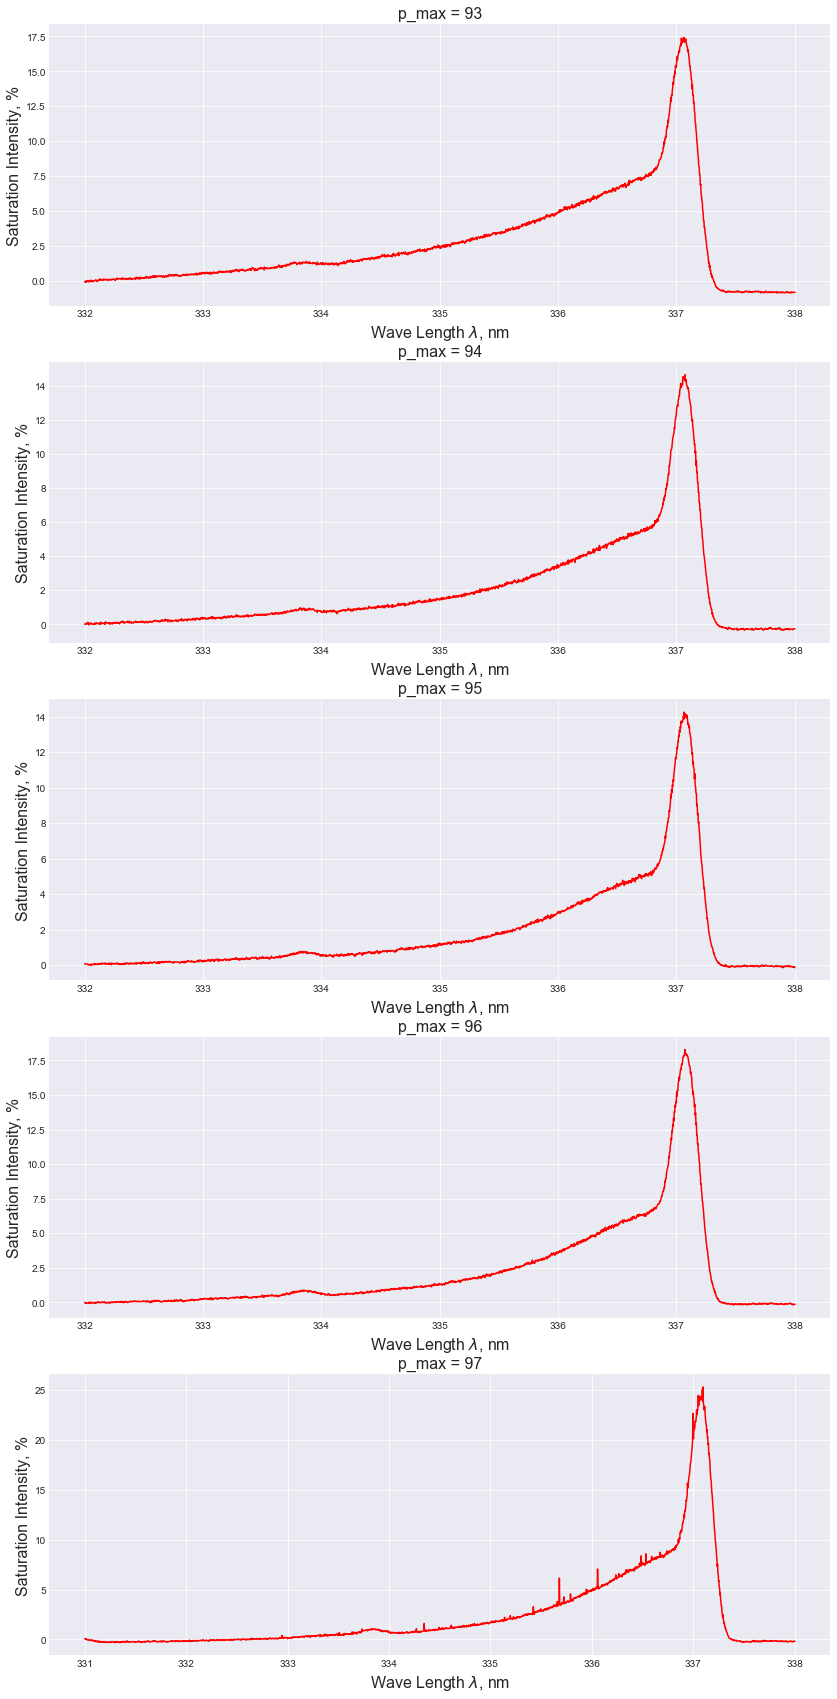

In [39]:
CurveLine.drawer(5, 1, 'p_max')

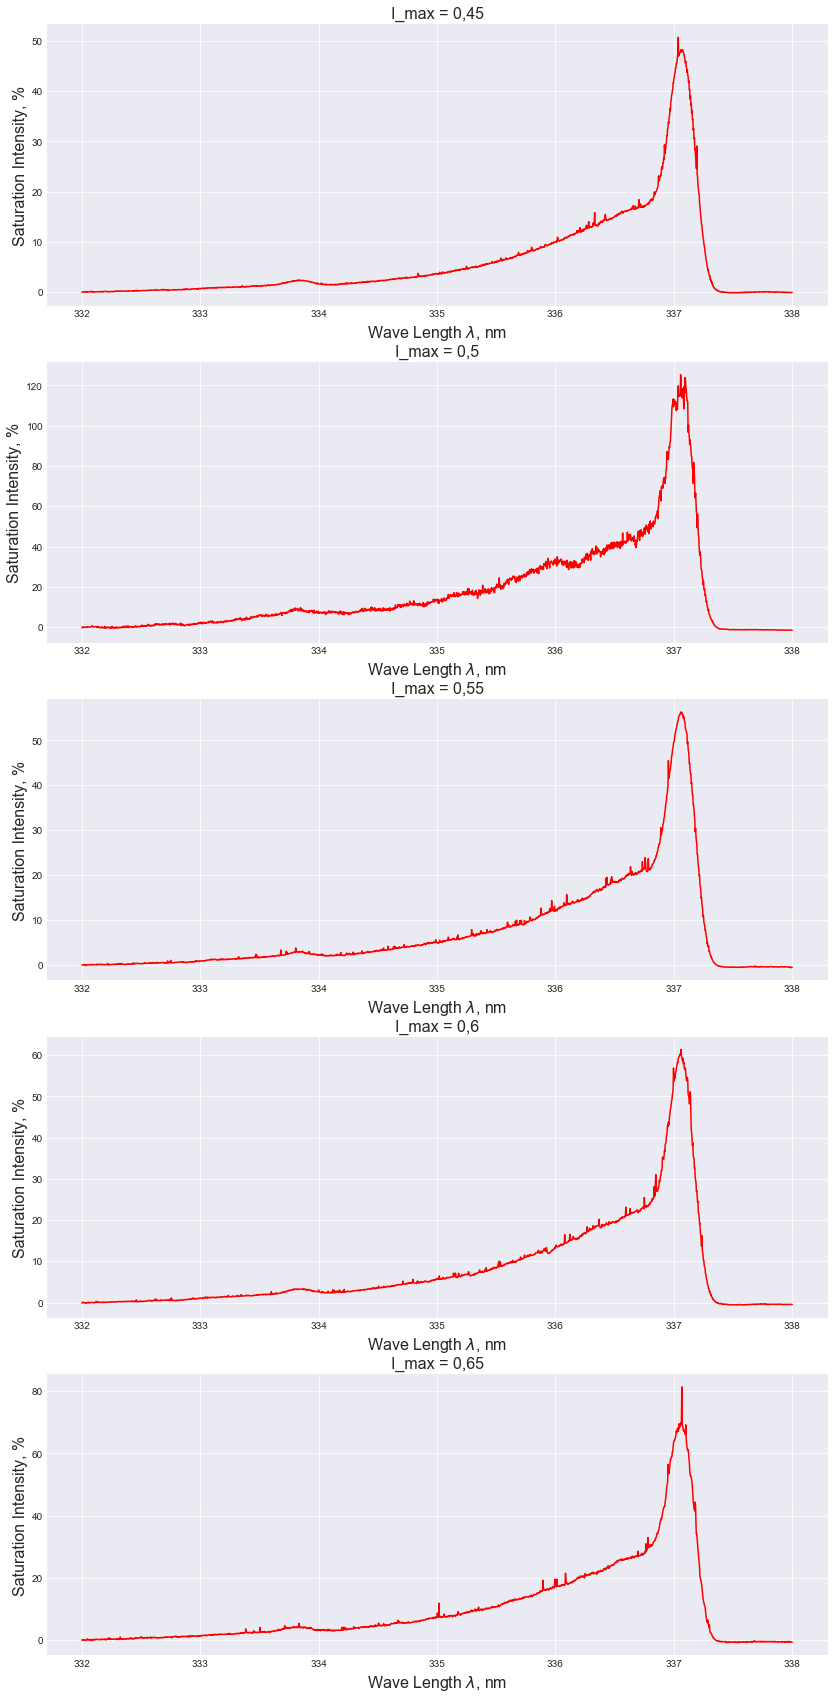

In [206]:
CurveLine.drawer(5, 1, 'I_max')

In [232]:
log_I = list([0 for i in range(5)])
for i in range(len(pressure or current)):
    log_I[i] = log(storage['I_max'][i].df[335:337.3])
log_I = dict(zip(current, log_I))

In [819]:
def drawer(rows, columns, container, title, name, color, fontsize,\
           folder='pics/', ext='png', dpi=500, x=None, popt=None, p=None):  
        fig, axes = subplots(rows, columns, figsize=(14, 30))  # would better use kwargs 
        
        for i, ax in enumerate(axes.flatten()):
            if not p:
                ax.plot(list(container.values())[i], color)
            else:
                ax.plot(x[i], list(container.values())[i], color, x[i], p[i], '--k')
                err = array(p[i]) - array(list(container.values())[i]['saturation'])
                _max = max(err)
                _min = min(err)
                res = round((_max+_min),3)
                ax.errorbar(x[i], p[i], color='k',\
                            yerr = err, fmt='--o', capthick=0, ecolor='k')
                patch = mpt.Patch(color='black', label='fit: k=%5.3f' % tuple(popt[i])[0]+\
                        ' $\pm$ '+ str(res))
                ax.legend(handles=[patch], fontsize=fontsize)
            ax.set_title(name+', I'+' = '+current[i], fontsize=fontsize)  # title is unused, fig has no
            ax.set_xlabel('Wave Length $\lambda$, nm', fontsize=fontsize) 
            ax.set_ylabel('Saturation Intensity, %', fontsize=fontsize)
            #f i+1 == len(storage[_]):
                #avefig(folder+name+'.'+ext, format=ext, dpi=dpi)

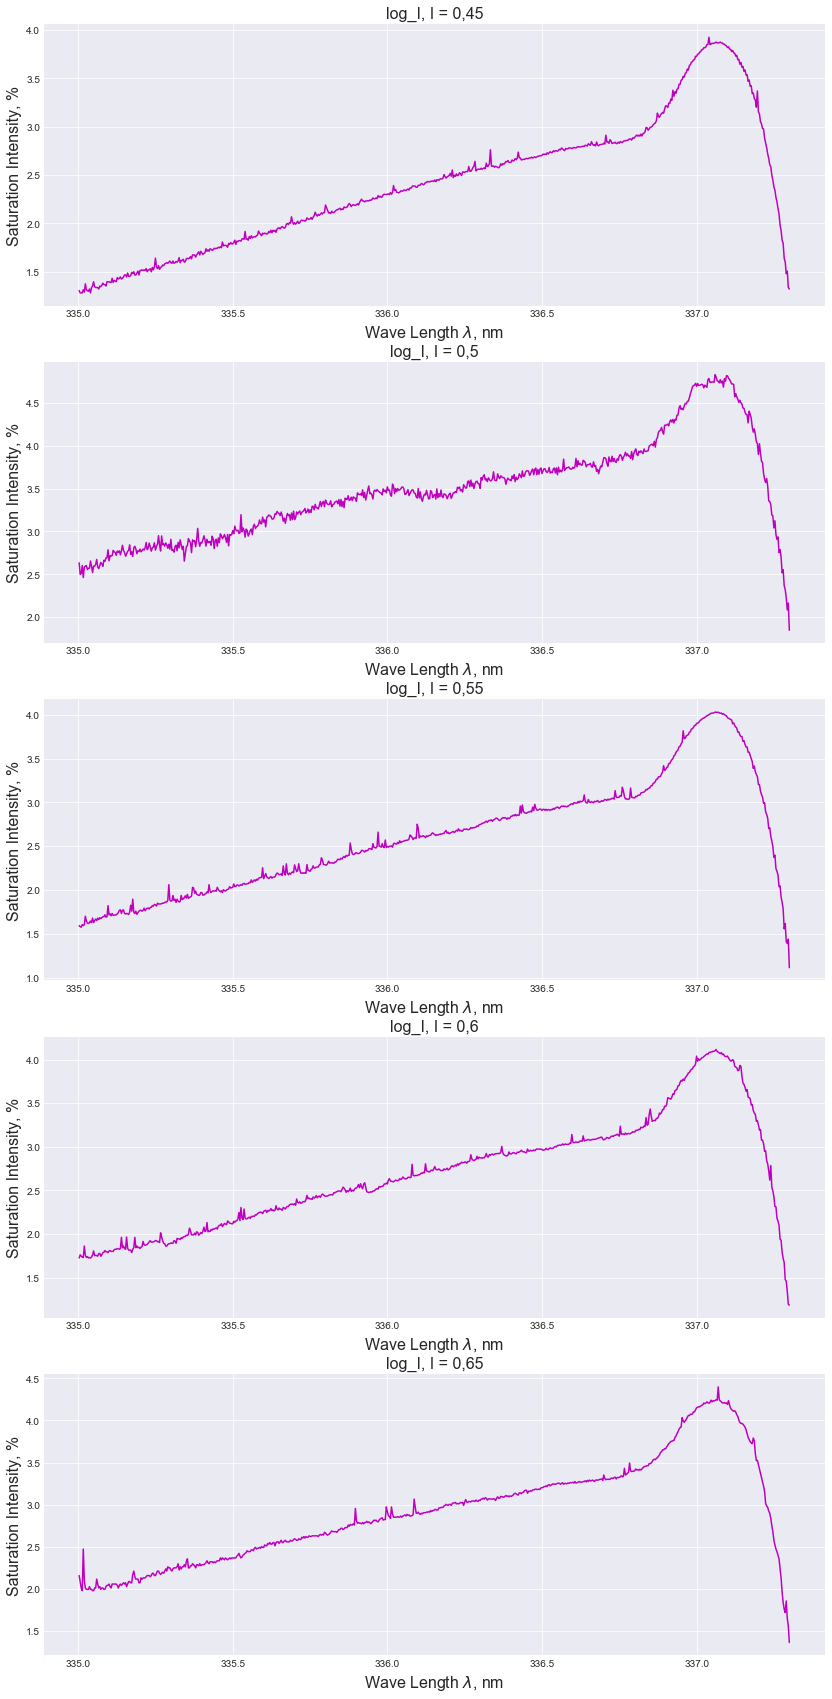

In [816]:
drawer(5, 1, log_I, 'Logarithm of unresolved rotational structure', 'log_I', '-m', 16)

In [761]:
lin_log_I = list([0 for i in range(5)])
for i in range(len(pressure or current)):
    lin_log_I[i] = log_I[current[i]][335.35:335.86]
lin_log_I = dict(zip(current, lin_log_I))

In [762]:
x = list([0 for i in range(5)])
y = list([0 for i in range(5)])
for i in range(len(pressure or current)):
    x[i] = lin_log_I[current[i]].index
    y[i] = lin_log_I[current[i]]['saturation']

In [763]:
lin_list = list([None for i in range(5)])
#tmp = list([None for i in range(5)])
for i in range(len(pressure or current)):
    #x[i] = x[i]*(1+i/10)  # podgon
    appr = np.polyfit(x[i], y[i], 1)
    #tmp[i] = appr
    lin = np.polyval(appr, x[i])
    lin_list[i] = lin
    print(appr)

[   1.03497288 -345.43673086]
[   1.07826187 -358.77006081]
[   0.8471294  -282.16549373]
[   1.03536798 -345.2256839 ]
[   0.92372226 -307.51965293]


In [513]:
tmp  # dont' touch anymore

[array([   1.03497288, -345.43673086]),
 array([   0.98023806, -358.77006081]),
 array([   0.70594117, -282.16549373]),
 array([   0.79643691, -345.2256839 ]),
 array([   0.65980161, -307.51965293])]

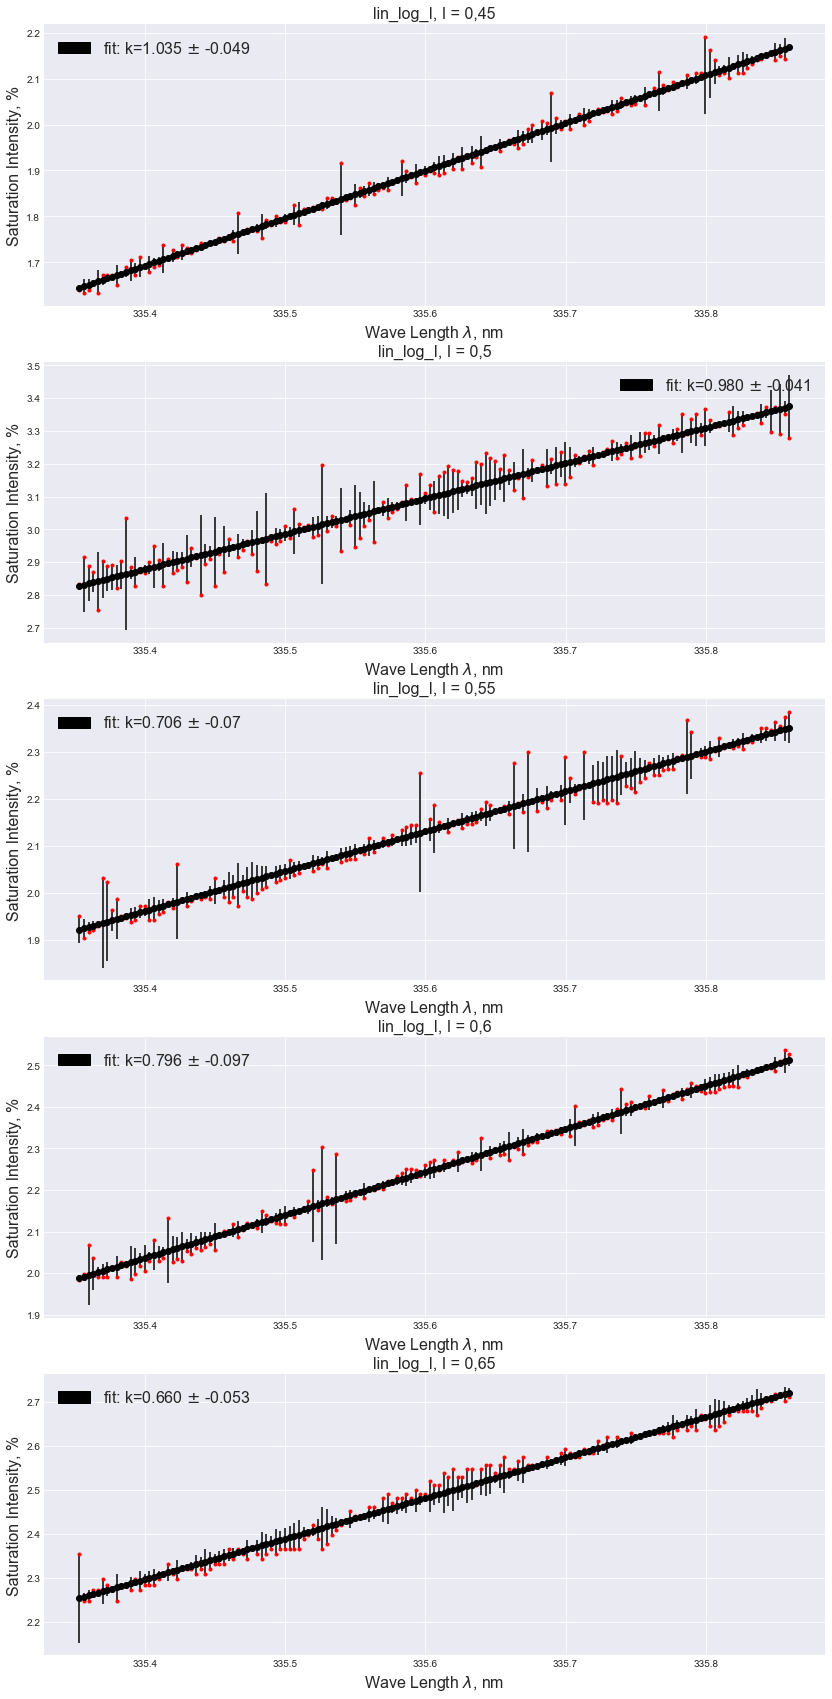

In [820]:
drawer(5, 1, lin_log_I, 'stuff', 'lin_log_I', '.r', 16, x=x, popt=tmp, p=lin_list)

In [534]:
tuple(tmp[0])[0]

1.0349728840089252

In [546]:
na_glaz = [930, 1020, 1250, 1150, 1400]
angles = []
for i in range(5):
    t = tuple(tmp[i])[0]
    angles.append(arctan(t)*180/pi)
    print('k= ', t, 'angle= ', arctan(t)*180/pi, 'Trot = ', na_glaz[i])

k=  1.0349728840089252 angle=  45.984583835929975 Trot =  930
k=  0.9802380601052383 angle=  44.42823128820126 Trot =  1020
k=  0.7059411698691158 angle=  35.21984214129623 Trot =  1250
k=  0.7964369081617406 angle=  38.53510993013812 Trot =  1150
k=  0.6598016110351781 angle=  33.4168926209262 Trot =  1400


In [806]:
Trot = pd.DataFrame()
Trot['I, A'] = current
#Trot = Trot.set_index(Trot['I, A'])
Trot['angle, deg'] = angles
Trot['Trot, K'] = na_glaz
Trot

,"I, A","angle, deg","Trot, K"
0,"0,45",45.984584,930
1,"0,5",44.428231,1020
2,"0,55",35.219842,1250
3,"0,6",38.535110,1150
4,"0,65",33.416893,1400


In [917]:
moves1 = [0.1, 1.2, 2.3]
moves2 = [0.2, 1.3, 2.4]
fk1 = [0.3291, 0.2033, 0.06345]
fk2 = [0.1462, 0.1990, 0.1605]
fk1 = dict(zip(moves1, fk1))
fk2 = dict(zip(moves1, fk2))
areas1 = []
areas2 = []

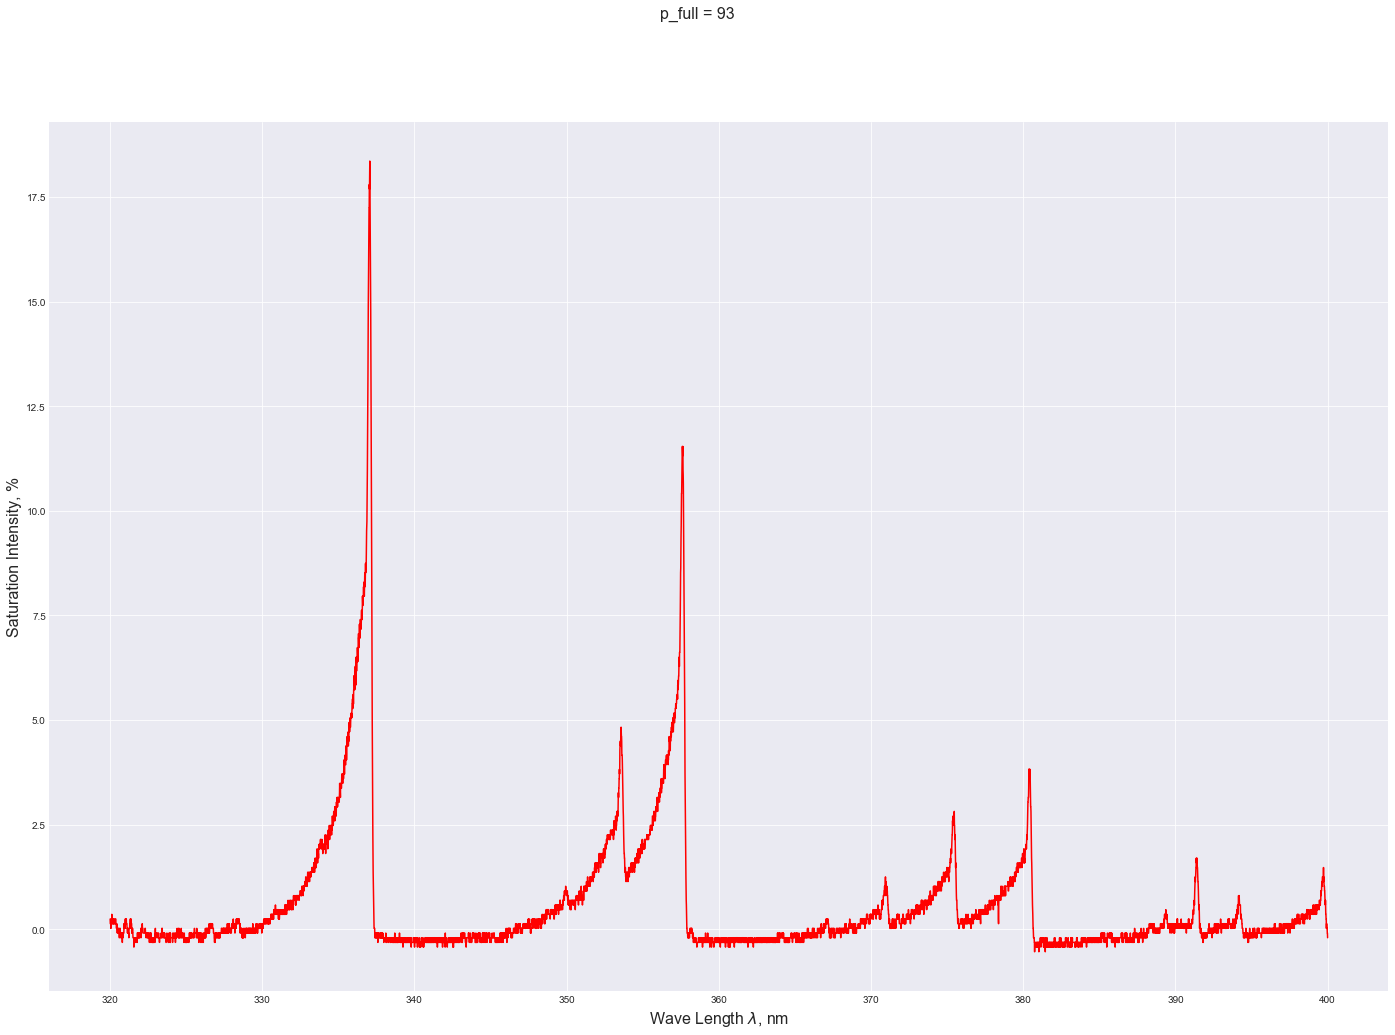

In [850]:
CurveLine.drawer(1, 1, 'p_full', ax=False)

In [869]:
storage['p_full'][0].df['saturation'][353.88:358.0]  # 0->1

wave length $\lambda$
353.88    1.249945
353.89    1.249945
353.90    1.249945
353.91    1.138106
353.92    1.249945
353.93    1.361785
353.94    1.249945
353.95    1.249945
353.96    1.249945
353.97    1.249945
353.98    1.361785
353.99    1.361785
354.00    1.361785
354.01    1.361785
354.02    1.249945
354.03    1.138106
354.04    1.249945
354.05    1.361785
354.06    1.361785
354.07    1.361785
354.08    1.473624
354.09    1.473624
354.10    1.473624
354.11    1.361785
354.12    1.249945
354.13    1.361785
354.14    1.473624
354.15    1.473624
354.16    1.473624
354.17    1.361785
            ...   
357.71    8.295817
357.72    7.736621
357.73    7.512942
357.74    6.841907
357.75    6.394550
357.76    5.387997
357.77    4.381444
357.78    3.710409
357.79    3.263052
357.80    2.927534
357.81    2.592016
357.82    2.032820
357.83    1.585463
357.84    1.249945
357.85    0.914428
357.86    0.690749
357.87    0.578910
357.88    0.355232
357.89    0.131553
357.90    0.019714
357.91   

In [939]:
def to_square(c_num):
    return (-(imag(c_num) + real(c_num)))**0.5

In [944]:
x = array(storage['p_full'][0].df.index)
y = array(storage['p_full'][0].df['saturation'][353.91:357.97])
ft = fft.fft(y)
areas1.append(to_square(trapz(ft)))

In [941]:
storage['p_full'][0].df['saturation'][350.28:353.88]  # 1->2

wave length $\lambda$
350.28    0.578910
350.29    0.467071
350.30    0.467071
350.31    0.690749
350.32    0.690749
350.33    0.690749
350.34    0.690749
350.35    0.690749
350.36    0.690749
350.37    0.690749
350.38    0.690749
350.39    0.690749
350.40    0.690749
350.41    0.690749
350.42    0.578910
350.43    0.690749
350.44    0.578910
350.45    0.578910
350.46    0.578910
350.47    0.578910
350.48    0.578910
350.49    0.690749
350.50    0.578910
350.51    0.578910
350.52    0.690749
350.53    0.690749
350.54    0.690749
350.55    0.690749
350.56    0.578910
350.57    0.467071
            ...   
353.59    4.716961
353.60    4.605122
353.61    4.605122
353.62    4.493283
353.63    4.157765
353.64    4.157765
353.65    4.157765
353.66    4.045926
353.67    3.822248
353.68    3.486730
353.69    3.263052
353.70    3.039373
353.71    3.039373
353.72    2.815695
353.73    2.703856
353.74    2.368338
353.75    2.256499
353.76    2.032820
353.77    1.920981
353.78    1.809142
353.79   

In [945]:
x = array(storage['p_full'][0].df.index)
y = array(storage['p_full'][0].df['saturation'][350.30:353.90])
ft = fft.fft(y)
areas1.append(to_square(trapz(ft)))

In [1007]:
storage['p_full'][0].df['saturation'][347:350.30]  # 2->3

wave length $\lambda$
347.00    0.019714
347.01    0.019714
347.02   -0.092125
347.03    0.019714
347.04   -0.092125
347.05    0.019714
347.06   -0.092125
347.07    0.019714
347.08   -0.092125
347.09   -0.092125
347.10    0.019714
347.11    0.019714
347.12    0.019714
347.13    0.019714
347.14    0.131553
347.15    0.131553
347.16    0.019714
347.17    0.019714
347.18    0.019714
347.19    0.019714
347.20    0.131553
347.21    0.019714
347.22    0.131553
347.23    0.131553
347.24    0.131553
347.25    0.019714
347.26    0.131553
347.27    0.131553
347.28    0.131553
347.29    0.019714
            ...   
350.01    0.802588
350.02    0.914428
350.03    0.914428
350.04    0.914428
350.05    0.914428
350.06    0.802588
350.07    0.690749
350.08    0.690749
350.09    0.802588
350.10    0.802588
350.11    0.578910
350.12    0.690749
350.13    0.690749
350.14    0.690749
350.15    0.578910
350.16    0.690749
350.17    0.690749
350.18    0.578910
350.19    0.578910
350.20    0.578910
350.21   

In [1009]:
x = array(storage['p_full'][0].df.index)
y = array(storage['p_full'][0].df['saturation'][347.08:350.29])  # extremely weak
ft = fft.fft(y)
areas1.append(to_square(trapz(ft)))

In [1036]:
areas1  # 4.309460908347159

[7.131425089293006, 7.952199669271471, 8.282621763961123]

In [988]:
storage['p_full'][0].df['saturation'][375.58:380.9]  # 0->2

wave length $\lambda$
375.58    1.361785
375.59    1.249945
375.60    0.914428
375.61    0.802588
375.62    0.690749
375.63    0.690749
375.64    0.690749
375.65    0.467071
375.66    0.467071
375.67    0.467071
375.68    0.355232
375.69    0.243392
375.70    0.131553
375.71    0.243392
375.72    0.243392
375.73    0.131553
375.74    0.243392
375.75    0.243392
375.76    0.131553
375.77    0.131553
375.78    0.019714
375.79    0.131553
375.80    0.019714
375.81    0.131553
375.82    0.131553
375.83    0.131553
375.84    0.131553
375.85    0.131553
375.86    0.131553
375.87    0.131553
            ...   
380.61    0.578910
380.62    0.467071
380.63    0.355232
380.64    0.131553
380.65    0.019714
380.66    0.019714
380.67   -0.092125
380.68   -0.203965
380.69   -0.203965
380.70   -0.203965
380.71   -0.203965
380.72   -0.203965
380.73   -0.315804
380.74   -0.315804
380.75   -0.539482
380.76   -0.315804
380.77   -0.315804
380.78   -0.315804
380.79   -0.315804
380.80   -0.315804
380.81   

In [993]:
x = array(storage['p_full'][0].df.index)
y = array(storage['p_full'][0].df['saturation'][375.80:380.80])  # nice
ft = fft.fft(y)
areas2.append(to_square(trapz(ft)))

In [1000]:
storage['p_full'][0].df['saturation'][371.0:375.8]  # 1->3

wave length $\lambda$
371.00    1.026267
371.01    0.914428
371.02    1.026267
371.03    0.914428
371.04    1.026267
371.05    0.914428
371.06    0.802588
371.07    0.914428
371.08    0.802588
371.09    0.802588
371.10    0.690749
371.11    0.578910
371.12    0.578910
371.13    0.467071
371.14    0.467071
371.15    0.355232
371.16    0.355232
371.17    0.355232
371.18    0.131553
371.19    0.243392
371.20    0.131553
371.21    0.243392
371.22    0.131553
371.23    0.131553
371.24    0.019714
371.25    0.019714
371.26    0.019714
371.27    0.019714
371.28    0.019714
371.29    0.131553
            ...   
375.51    2.144659
375.52    2.256499
375.53    2.144659
375.54    1.920981
375.55    1.697302
375.56    1.473624
375.57    1.585463
375.58    1.361785
375.59    1.249945
375.60    0.914428
375.61    0.802588
375.62    0.690749
375.63    0.690749
375.64    0.690749
375.65    0.467071
375.66    0.467071
375.67    0.467071
375.68    0.355232
375.69    0.243392
375.70    0.131553
375.71   

In [1023]:
x = array(storage['p_full'][0].df.index)
y = array(storage['p_full'][0].df['saturation'][371.26:375.79])
ft = fft.fft(y)
areas2.append(to_square(trapz(ft)))

In [1018]:
storage['p_full'][0].df['saturation'][367.2:371.25]  # 2->4

wave length $\lambda$
367.20    0.131553
367.21    0.131553
367.22    0.019714
367.23    0.019714
367.24    0.019714
367.25   -0.092125
367.26    0.019714
367.27   -0.092125
367.28   -0.203965
367.29   -0.092125
367.30   -0.092125
367.31   -0.203965
367.32   -0.092125
367.33   -0.203965
367.34   -0.092125
367.35   -0.203965
367.36   -0.092125
367.37    0.019714
367.38   -0.092125
367.39    0.019714
367.40   -0.203965
367.41   -0.092125
367.42   -0.092125
367.43   -0.092125
367.44   -0.092125
367.45    0.019714
367.46    0.019714
367.47    0.019714
367.48    0.019714
367.49    0.019714
            ...   
370.96    1.026267
370.97    1.026267
370.98    1.138106
370.99    1.026267
371.00    1.026267
371.01    0.914428
371.02    1.026267
371.03    0.914428
371.04    1.026267
371.05    0.914428
371.06    0.802588
371.07    0.914428
371.08    0.802588
371.09    0.802588
371.10    0.690749
371.11    0.578910
371.12    0.578910
371.13    0.467071
371.14    0.467071
371.15    0.355232
371.16   

In [1054]:
x = array(storage['p_full'][0].df.index)
y = array(storage['p_full'][0].df['saturation'][367.3:371.25])
ft = fft.fft(y)
areas2.append(to_square(trapz(ft)))

In [1035]:
areas2

[11.475752679590322, 10.124142108886236, 7.695064144467226]

In [1077]:
lambdas1 = [357.64, 353.64, 349.94]
lambdas2 = [380.44, 375.45, 371.02]

In [1078]:
def func(num):
    if num == 1:
        x = lambdas1
        for i in range(3):
             func1.append(log(y[x[i]]*x[i]**4/list(fk1.values())[i])/areas1[i]*0.6925)
    else:
        x = lambdas2
        for i in range(3):
             func2.append(log(y[x[i]]*x[i]**4/list(fk2.values())[i])/areas2[i]*0.6925)

In [1079]:
y = storage['p_full'][0].df['saturation']

In [1080]:
func(1)

In [1081]:
func1

[2.629153146068382, 2.306925715890775, 2.191760821785755]

In [1082]:
func(2)

In [1083]:
func2

[1.6310507991490506, 1.8004220859591689, 2.296652209368114]

In [1076]:
#areas1 = dict(zip(moves1, areas1))
#areas2 = dict(zip(moves2, areas2))
func1 = []
func2 = []

In [1095]:
x1, y1 = lambdas1, func1
appr = np.polyfit(x1, y1, 1)
lin1 = np.polyval(appr, x1)
print(appr)

[  0.05712453 -17.83128487]


In [1096]:
x2, y2 = lambdas2, func2
appr = np.polyfit(x2, y2, 1)
lin2 = np.polyval(appr, x2)
print(appr)

[-0.06988841 28.16202466]


In [1098]:
lin2

array([1.5736777 , 1.92242087, 2.23202653])

Text(0, 0.5, 'Function of T')

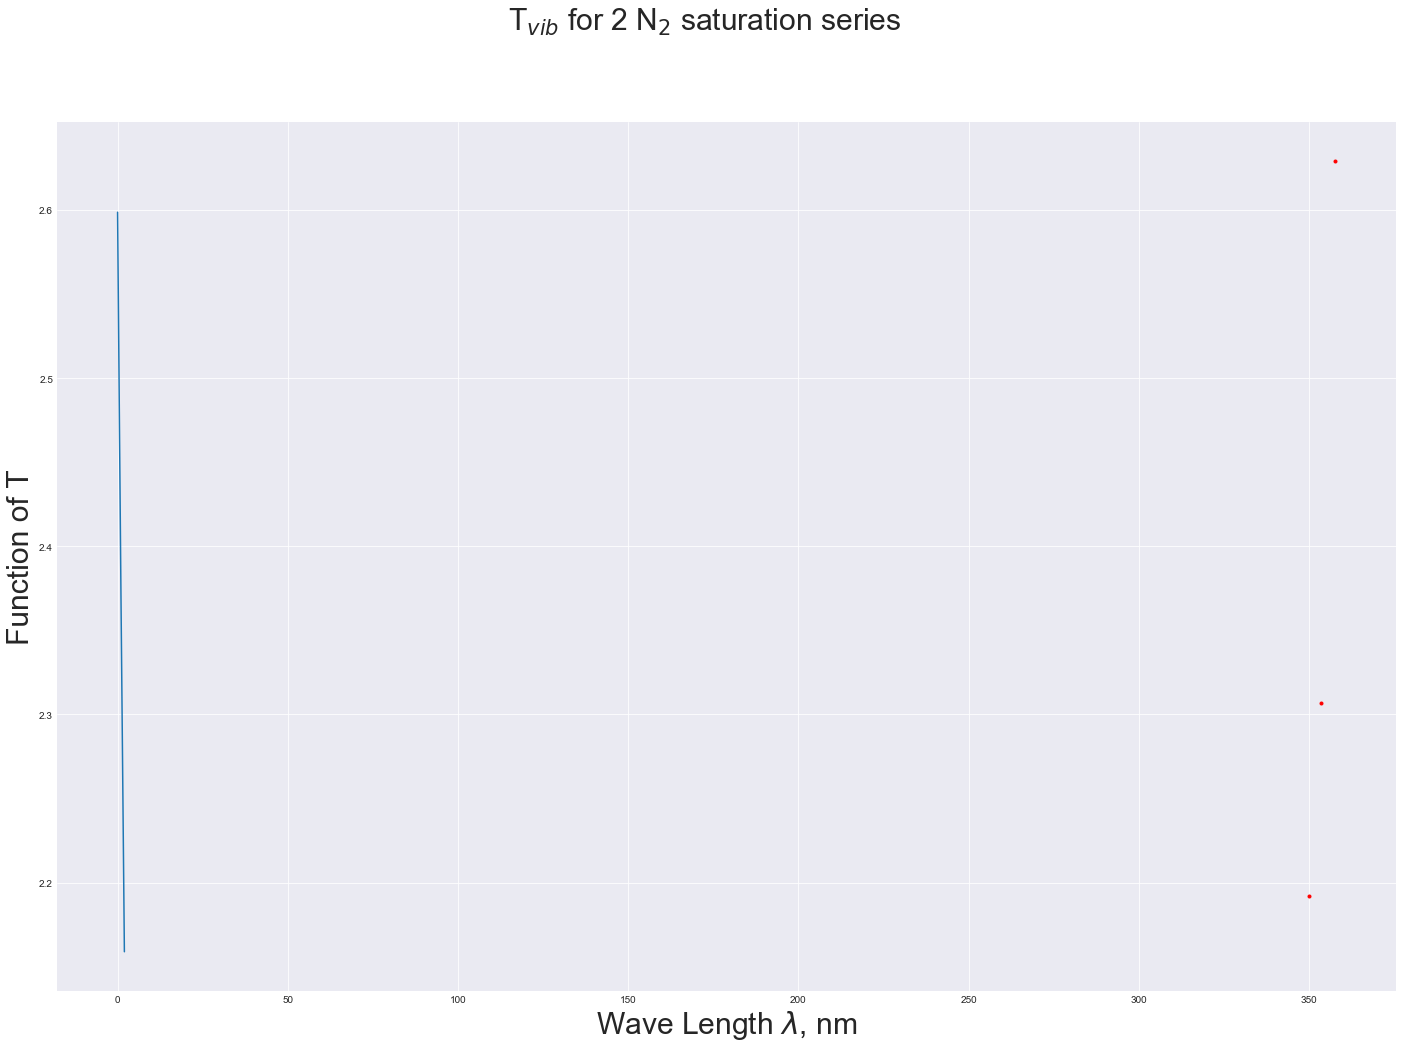

In [1100]:
plot(x1, y1, '.r', lin1)
suptitle('T$_{vib}$ for 2 N$_2$ saturation series', fontsize=30)
xlabel('Wave Length $\lambda$, nm', fontsize=30) 
ylabel('Function of T', fontsize=30)